In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
seed(2022)

# Test function

In [ ]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [ ]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=2)
print(X)

In [ ]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
X_lecturer = create_X(x = x, y = y, n = 2)
np.sum(X_lecturer == X) == len(X.ravel())

In [ ]:
X_lecturer.shape

In [ ]:
np.mean(X_lecturer, axis=1).shape

In [ ]:
X_lecturer[:,1] - np.mean(X_lecturer[:,1])

# Time for generating design matrices

In [ ]:
import time
model_complexity = 5
xvec = np.array([x,y])
for p in range(1,model_complexity+1):

    tik = time.time()
    X = make_design_matrix(xvec = xvec, p = p)
    #X = create_X(x = x1, y=y1, n = p)
    tok = time.time()
    print(tok-tik)

In [ ]:
import time
model_complexity = 5
xvec = np.array([x1,y1])
for p in range(1,model_complexity+1):
    tik = time.time()
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    tok = time.time()
    print(tok-tik)

# Simple 1D test case

In [ ]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

In [ ]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
X = make_design_matrix(xvec = xvec, p = 5)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


In [ ]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y + np.exp(-x**2) +np.exp(-x*y) + np.exp(-y) 
xvec = np.array([x, y])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func_2(**{'x%i'%i: xvec[i] for i in range(len(xvec))})

noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde + np.mean(znoisy), cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)

# b)

In [ ]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
for p in range(1,6):
    X = make_design_matrix(xvec = xvec, p = p)
    znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = (znoisy_tilde + np.mean(znoisy)).reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.view_init(20,45)

In [ ]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
test_size = 0.3
for N in [50,100, 500]:
    x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
    xvec = np.array([x,y])
    maxdeg = 10
    mses_train = np.zeros((maxdeg))
    mses_test = np.zeros((maxdeg))
    Rs_train = np.zeros((maxdeg))
    Rs_test = np.zeros((maxdeg))

    betas = []
    z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    for p in range(1,maxdeg+1):
        print(p)
        #X = make_design_matrix(xvec = xvec, p = p)
        X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)

        Xtrain, Xtest, znoisy_train, znoisy_test = train_test_split(X, znoisy.ravel(), 
                                                                    **{'random_state' : 42, 'test_size':test_size})
        scale = 1/np.sqrt(np.sum(znoisy_train**2))
        ztilde_train, betahat = ols_fp_wo_split(X = Xtrain, y = scale*(znoisy_train-np.mean(znoisy_train)))

        ztilde_train = (1/scale)*ztilde_train + np.mean(znoisy_train)
        ztilde_test = (1/scale)*Xtest@betahat + np.mean(znoisy_train)
        betas.append(betahat)

        mses_train[p-1] = MSE(y = znoisy_train,ytilde = ztilde_train)
        mses_test[p-1] = MSE(y = znoisy_test,ytilde = ztilde_test )
        Rs_train[p-1] = Rscore(y = znoisy_train, ytilde = ztilde_train)
        Rs_test[p-1] = Rscore(y = znoisy_test, ytilde = ztilde_test)

    fig, axs = plt.subplots(1,2, figsize=(10,5))
    polydeg = np.arange(maxdeg)+1
    fig.suptitle("$N=%i$, testsize $%.1f$ percentage"%(N, test_size*100))
    axs[0].plot(polydeg, mses_train, ls="--", marker='o', label="Train")
    axs[0].plot(polydeg, mses_test, marker='o', label="Test")
    axs[0].set_ylabel("MSE")
    axs[1].plot(polydeg, Rs_train, marker='o', ls = "--", label = "Train")
    axs[1].plot(polydeg, Rs_test, marker='o', label = "Test")

    axs[1].set_ylabel("$R^2$ score")
    [ax.set_xlabel("Polynomial degree $p$") for ax in axs]
    [ax.set_xticks(polydeg, polydeg) for ax in axs]
    [ax.legend() for ax in axs]
    fig.tight_layout()

In [ ]:
%matplotlib inline
beta_matrix = np.ones((maxdeg, len(betas[-1])))*np.nan
plt.figure(figsize=(10,10))
for i in range(maxdeg):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(np.arange(maxdeg) + 1, beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(ncol = 2, bbox_to_anchor=(1,.5,.15,.5))
plt.xticks(np.arange(maxdeg) + 1,np.arange(maxdeg) + 1)

# c)

To plot surface data retrieve the indices from the uniqueness of the xy-coordinates.

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
X = make_design_matrix(xvec = xvec, p = 4)
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                          **{"test_size" : 0.25, 
                                                                                             "random_state" : 42})
xtrain = Xtrain[:,1]
ytrain = Xtrain[:,2]
shape_train = (x.shape[0], len(ytrain)//x.shape[0])
xtest = Xtest[:,1]
ytest = Xtest[:,2]
shape_test = (x.shape[0], len(ytest)//x.shape[0])

fig, axs = plt.subplots(2,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
axs[0,0].scatter(xtrain, ytrain, ztilde_train, c=ztilde_train, cmap=cm.viridis)
#axs[0].scatter(xtrain, ytrain, ztrain, c=ztrain, cmap=cm.coolwarm)
axs[0,1].scatter(xtrain, ytrain, np.mean(z)+ztrain-ztilde_train, c=np.mean(z)+ztrain-ztilde_train, cmap=cm.coolwarm)

axs[1,0].scatter(xtest, ytest, ztilde_test, c=ztilde_test, cmap=cm.viridis)
#axs[1].scatter(xtest, ytest, ztest, c=ztest, cmap=cm.coolwarm)
axs[1,1].scatter(xtest, ytest, ztest + np.mean(z)-ztilde_test, c=np.mean(z)+ztest-ztilde_test, cmap=cm.coolwarm)
[ax.view_init(15,45) for ax in axs.ravel()]

# Bias-variance trade-off

### 1D test case


In [ ]:
def test_func_exp(**kwargs):
    x = kwargs['x0']
    return np.exp(x -x**2) + 5*x**2 + x

In [ ]:
seed(2022)
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x = np.arange(0,1,0.01)
xvec = np.array([x])
z = test_func_exp(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(model_complexity)[::2]+1,np.arange(20)[::2]+1)

## 2D Test case

In [ ]:
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return np.exp(x -(x+y)**2) + 5*x**2 + x*y

model_complexity = 10
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
# plot log10(MSE) wrt to the polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(model_complexity)[::2]+1,np.arange(model_complexity)[::2]+1)

# Bias-variance trade-off Franke function

In [ ]:
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))

z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    bias_train[p-1] = np.mean((ztrain-np.mean(ztilde_train))**2)
    variance_train[p-1] = np.var(ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    bias_test[p-1] = np.mean((ztest-np.mean(ztilde_test))**2)
    variance_test[p-1] = np.var(ztilde_test)

# plot log10(MSE) wrt polynomial degrees
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_train), label="Bias train")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(variance_train), label="Var train")
plt.plot(ps, np.log10(variance_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# Bootstrap

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = 1000
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))

z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise

for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                                  **{"test_size" : 0.25, 
                                                                                                    "random_state" : 42})
    for ik in range(k):
        z_resampled = resample(data = ztrain)
        
        mses_train[p-1, ik] = MSE(y = ztrain,ytilde = ztilde_train)
        Rs_train[p-1, ik] = Rscore(y = ztrain, ytilde = ztilde_train)
        bias_train[p-1, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
        variance_train[p-1, ik] = np.var(ztilde_train)

        mses_test[p-1, ik] = MSE(y = ztest,ytilde = ztilde_test)
        Rs_test[p-1, ik] = Rscore(y = ztest, ytilde = ztilde_test)
        bias_test[p-1, ik] = np.mean((ztest-np.mean(ztilde_test))**2)
        variance_test[p-1, ik] = np.var(ztilde_test)

# plot log10(MSE) wrt polynomial degrees
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(variance_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(variance_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# d) cross validation

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
k = 5
mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    mses_train[p-1], mses_test[p-1], bias_train[p-1], bias_test[p-1], var_train[p-1], var_test[p-1] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ols")
# plot log10(MSE) wrt polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(var_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(var_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

### Ridge comparison $\lambda = 0$

Text(0.5, 0, 'Polynomial degree')

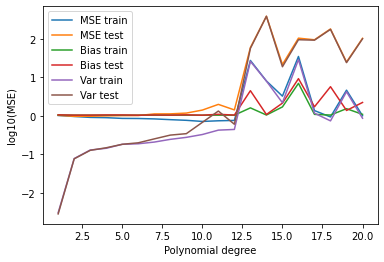

In [3]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
k = 5
mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    mses_train[p-1], mses_test[p-1], bias_train[p-1], bias_test[p-1], var_train[p-1], var_test[p-1] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ridge", lmbda=0)
# plot log10(MSE) wrt polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(var_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(var_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# e) Ridge with CV and bootstrap
- Bias-variance trade-off

## CV
- check: for $\lambda = 0$ do I get the same as the OLS

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.001),np.arange(0,1,0.001))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
model_complexity = 20
k = 10
lambdas = np.array([0]+list(np.logspace(-5,5,10)))
mses_train, bias_train, var_train = np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity, len(lambdas), k))
mses_test, bias_test, var_test = np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity, len(lambdas), k))
for p in range(1, model_complexity+1):
    print(p)
    X = make_design_matrix(xvec = xvec, p = p)
    for i in range(len(lambdas)):
        #print(lambdas[i])
        cv_res = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ridge", lmbda = lambdas[i])
        mses_train[p-1, i], mses_test[p-1, i], bias_train[p-1, i], bias_test[p-1, i], var_train[p-1, i], var_test[p-1, i] = [x for x in cv_res]

In [ ]:
fig, axs = plt.subplots(1,len(lambdas), figsize=(len(lambdas)*5,5))

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(np.mean(mses_train[:,i],axis=1)),  label="MSE train", color = 'b')
    axs[i].plot(ps, np.log10(np.mean(mses_test[:,i], axis=1)),  label="MSE test",  color = 'b', ls='--')
    axs[i].plot(ps, np.log10(np.mean(bias_train[:,i],axis=1)),  label="Bias train",color = 'C1')
    axs[i].plot(ps, np.log10(np.mean(bias_test[:,i], axis=1)),  label="Bias test", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(np.mean(var_train[:,i], axis=1)),  label="Var train", color = 'C2')
    axs[i].plot(ps, np.log10(np.mean(var_test[:,i],  axis=1)),  label="Var test",  color = 'C2', ls='--')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

In [ ]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.viridis(carr)
cs_test = plt.cm.plasma(carr)
fig, axs = plt.subplots(1,2, figsize=(20,5))
for ip in range(mses_train.shape[0]):
    axs[0].plot(lambdas, np.mean(mses_train[ip], axis=1), color = cs_train[ip], label="p = %i"%(ip+1))
    axs[1].plot(lambdas, np.mean(mses_test[ip], axis=1), color = cs_test[ip], label="p = %i"%(ip+1))
axs[0].set_title("Train")
axs[1].set_title("Test")

[ax.set_xscale('log') for ax in axs]
[ax.set_yscale('log') for ax in axs]

[ax.set_ylabel("MSE") for ax in axs]
[ax.set_xlabel("log10$\\lambda$") for ax in axs]
[ax.legend(bbox_to_anchor=(1.5,.8,0,.1), ncol=2) for ax in axs]
fig.tight_layout()

## with bootstrapping

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = int(1e3)
x, y = np.meshgrid(np.arange(0,1,0.105),np.arange(0,1,0.105))
xvec = np.array([x,y])
lambdas = np.logspace(-6,4, 100)

mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity,len(lambdas),k)),np.zeros((model_complexity, len(lambdas),k)) 
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity,len(lambdas), k))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy)
    for i in range(len(lambdas)):
        for ik in range(k):
            z_resampled = resample(data = ztrain)
            ztilde_train, betahat = ridge_fp_wo_split(X=Xtrain, y=ztrain-np.mean(ztrain), lmbda = lambdas[i])
            ztilde_train += np.mean(ztrain)
            ztilde_test = Xtest@betahat + np.mean(ztrain)
            mses_train[p-1, i, ik] = MSE(y = ztrain ,ytilde = ztilde_train)
            bias_train[p-1, i, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
            var_train[p-1, i, ik] = np.var(ztilde_train)

            mses_test[p-1, i, ik] = MSE(y = ztest,ytilde = ztilde_test)
            bias_test[p-1, i, ik] = np.mean((ztest-np.mean(ztilde_test))**2)
            var_test[p-1, i, ik] = np.var(ztilde_test)

In [ ]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5))
for p in range(model_complexity):
    axs[p].set_title("$p = %i$"%(p+1))
    axs[p].plot(lambdas, np.log10(np.mean(mses_train[p], axis=1)), label="MSE Train")
    axs[p].plot(lambdas, np.log10(np.mean(mses_test[p], axis=1)), label="MSE Test") 
    #axs[p].plot(lambdas, np.log10(np.mean(bias_train[p], axis=1)), label="Bias Train")
    #axs[p].plot(lambdas, np.log10(np.mean(bias_test[p], axis=1)), label="Bias Test") 
    #axs[p].plot(lambdas, np.log10(np.mean(var_train[p], axis=1)), label="$\\sigma^2$ Train")
    #axs[p].plot(lambdas, np.log10(np.mean(var_test[p], axis=1)), label="$\\sigma^2$ Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
[ax.set_ylabel("log10(MSE)") for ax in axs]
fig.tight_layout()

## with cross-validation

In [ ]:
from sklearn import linear_model
import project1.project1; import importlib; importlib.reload(project1.project1); from project1.project1 import *
model_complexity = 5
k=5
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
lambdas = np.logspace(-2,10, 100)

mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity,len(lambdas),k)),np.zeros((model_complexity, len(lambdas),k)), np.zeros((model_complexity,len(lambdas),k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas),k))

for p in range(1, model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    for i in range(len(lambdas)):
        mses_train[p-1,i], mses_test[p-1,i], bias_train[p-1,i], bias_test[p-1,i], var_train[p-1,i], var_test[p-1,i] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ridge", lmbda = lambdas[i])

In [ ]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5), sharey=True)
for p in range(model_complexity):
    axs[p].set_title("$p=%i$"%(p+1))
    axs[p].plot(lambdas, np.log10(np.mean(mses_train[p], axis=1)), label="Train")
    axs[p].plot(lambdas, np.log10(np.mean(mses_test[p], axis=1)), label="Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
axs[0].set_ylabel("log10(MSE)")

# f) Lasso

## Bootstrapping

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
k = int(1e3)
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
lambdas = np.logspace(-6,4, 100)

mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity,len(lambdas),k)),np.zeros((model_complexity, len(lambdas),k)) 
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity,len(lambdas), k))
for p in range(1,model_complexity+1):
    print(p)
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy)
    for i in range(len(lambdas)):
        for ik in range(k):
            z_resampled = resample(data = ztrain)
            ztilde_train, betahat = lasso_fp_wo_split(X=Xtrain, y=ztrain-np.mean(ztrain), lmbda = lambdas[i])
            ztilde_train += np.mean(ztrain)
            ztilde_test = Xtest@betahat + np.mean(ztrain)
            mses_train[p-1, i, ik] = MSE(y = ztrain ,ytilde = ztilde_train)
            bias_train[p-1, i, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
            var_train[p-1, i, ik] = np.var(ztilde_train)

            mses_test[p-1, i, ik] = MSE(y = ztest,ytilde = ztilde_test)
            bias_test[p-1, i, ik] = np.mean((ztest-np.mean(ztilde_test))**2)
            var_test[p-1, i, ik] = np.var(ztilde_test)

In [ ]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5))
for p in range(model_complexity):
    axs[p].set_title("$p = %i$"%(p+1))
    axs[p].plot(lambdas, np.log10(np.mean(mses_train[p], axis=1)), label="MSE Train")
    axs[p].plot(lambdas, np.log10(np.mean(mses_test[p], axis=1)), label="MSE Test") 
    #axs[p].plot(lambdas, np.log10(np.mean(bias_train[p], axis=1)), label="Bias Train")
    #axs[p].plot(lambdas, np.log10(np.mean(bias_test[p], axis=1)), label="Bias Test") 
    #axs[p].plot(lambdas, np.log10(np.mean(var_train[p], axis=1)), label="$\\sigma^2$ Train")
    #axs[p].plot(lambdas, np.log10(np.mean(var_test[p], axis=1)), label="$\\sigma^2$ Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
[ax.set_ylabel("log10(MSE)") for ax in axs]
fig.tight_layout()

## CV

In [ ]:
from sklearn import linear_model
import project1.project1; import importlib; importlib.reload(project1.project1); from project1.project1 import *
model_complexity = 20
k=5
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
lambdas = np.logspace(-4,3, 100)

mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity,len(lambdas),k)),np.zeros((model_complexity, len(lambdas),k)), np.zeros((model_complexity,len(lambdas),k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas), k)),np.zeros((model_complexity,len(lambdas), k)), np.zeros((model_complexity, len(lambdas),k))

for p in range(1, model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    for i in range(len(lambdas)):
        mses_train[p-1,i], mses_test[p-1,i], bias_train[p-1,i], bias_test[p-1,i], var_train[p-1,i], var_test[p-1,i] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "lasso", lmbda = lambdas[i])

1
2
3


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.894e+02, tolerance: 8.673e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.051e+02, tolerance: 8.629e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+02, tolerance: 8.746e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.766e+01, tolerance: 8.680e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.082e+00, tolerance: 8.747e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+00, tolerance: 8.550e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

4


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+02, tolerance: 8.701e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+02, tolerance: 8.721e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+01, tolerance: 8.709e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+01, tolerance: 8.685e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

5


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e+02, tolerance: 8.663e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.411e+02, tolerance: 8.751e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+02, tolerance: 8.847e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.404e+01, tolerance: 8.713e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

6


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.700e+02, tolerance: 8.865e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+03, tolerance: 8.851e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+01, tolerance: 8.806e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+01, tolerance: 8.804e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

7


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.508e+02, tolerance: 8.796e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.667e+02, tolerance: 8.748e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+02, tolerance: 8.866e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+02, tolerance: 8.771e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.573e+00, tolerance: 8.784e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+00, tolerance: 8.778e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

8


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.706e+02, tolerance: 8.670e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.297e+02, tolerance: 8.793e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+02, tolerance: 8.809e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.839e+01, tolerance: 8.778e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

9


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.753e+02, tolerance: 8.632e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.709e+02, tolerance: 8.727e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.368e+01, tolerance: 8.705e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.181e+01, tolerance: 8.777e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+00, tolerance: 8.730e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.533e+00, tolerance: 8.733e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

10


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.604e+02, tolerance: 8.730e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.783e+02, tolerance: 8.722e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.992e+01, tolerance: 8.672e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.226e+01, tolerance: 8.686e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

11


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.213e+02, tolerance: 8.624e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.391e+01, tolerance: 8.408e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+00, tolerance: 8.576e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+01, tolerance: 8.427e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

12


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.228e+02, tolerance: 8.758e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.111e+02, tolerance: 8.768e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.003e+01, tolerance: 8.846e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.063e+01, tolerance: 8.705e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

13


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e+02, tolerance: 8.476e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+02, tolerance: 8.513e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.873e+00, tolerance: 8.600e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+01, tolerance: 8.670e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

14


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.687e+02, tolerance: 8.580e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.528e+02, tolerance: 8.807e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.712e+01, tolerance: 8.679e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+02, tolerance: 8.827e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

In [ ]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5), sharey=True)
for p in range(model_complexity):
    axs[p].set_title("$p=%i$"%(p+1))
    axs[p].plot(lambdas, np.log10(np.mean(mses_train[p], axis=1)), label="Train")
    axs[p].plot(lambdas, np.log10(np.mean(mses_test[p], axis=1)), label="Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
axs[0].set_ylabel("log10(MSE)")

In [ ]:
fig, axs = plt.subplots(1,len(lambdas)//10, figsize=(len(lambdas)//10*5,5))
ps = np.arange(model_complexity)+1

for i in range(0,len(lambdas),10):
    axs[i//10].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i//10].plot(ps, np.log10(np.mean(mses_train[:,i], axis=1)), label="Train", color='b')
    axs[i//10].plot(ps, np.log10(np.mean(mses_test[:,i], axis=1)), label="Test", color = 'C1')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]

# Real data 
# g)

### plot example

In [ ]:
from imageio import imread
datadir = "~/cs/ada_ml/ada_ml_project1/datafiles"
terrain1 = np.array(imread(datadir + "/SRTM_data_Norway_1.tif"))
terrain2 = np.array(imread(datadir + "/SRTM_data_Norway_2.tif"))
fig, axs = plt.subplots(1,2, figsize = (10,5))
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
im1 = axs[0].imshow(terrain1, cmap = plt.cm.terrain)
im2 = axs[1].imshow(terrain2, cmap = plt.cm.terrain)
cbar1 = fig.colorbar(im1, ax = axs[0])
cbar2 = fig.colorbar(im2, ax = axs[1])
x1, y1 = np.meshgrid(np.linspace(0,1, terrain1.shape[1]), np.linspace(0,1, terrain1.shape[0]) )
x2, y2 = np.meshgrid(np.linspace(0,1, terrain2.shape[1]), np.linspace(0,1, terrain2.shape[0]) )
axs_3d[0].plot_surface(x1, y1, terrain1/np.sqrt(np.sum(terrain1**2)), cmap =plt.cm.terrain)
axs_3d[1].plot_surface(x2, y2, terrain2/np.sqrt(np.sum(terrain2**2)), cmap =plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

## Test OLS

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
p = 10
xvec = np.array([x1,y1])

#X = make_design_matrix(xvec = xvec, p = p)
X = create_X(x = x1, y=y1, n = p)
Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1.ravel(), **{'random_state' : 42, 'test_size' : 0.3})
ztilde_train, betahat = ols_fp_wo_split(X=Xtrain, y=ztrain-np.mean(ztrain))
ztilde_train += np.mean(ztrain)
ztilde_test = Xtest@betahat + np.mean(ztrain)

In [ ]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,1][::100], 
                  Xtrain[:,2][::100], 
                  ztilde_train[::100], 
                  c=ztilde_train[::100], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,1][::100], 
                  Xtest[:,2][::100], 
                  ztilde_test[::100], 
                  c = ztilde_test[::100], cmap = plt.cm.terrain)

## Bias-variance trade-off analysis
1. OLS
2. Ridge
3. Lasso

with bootstrap and cross-validation in order to make a full comparison

### OLS bootstrap

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
k = int(10)
xvec = np.array([x1,y1])

mses_train, var_train, bias_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity,k)) 
mses_test, var_test, bias_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x1, y=y1, n = p)
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1.ravel())
    for ik in range(k):
        z_resampled = resample(data =ztrain)
        ztilde_train, betahat = ols_fp_wo_split(X=Xtrain, y=z_resampled-np.mean(z_resampled))
        ztilde_train += np.mean(z_resampled)
        ztilde_test = Xtest@betahat + np.mean(z_resampled)
        mses_train[p-1, ik] = MSE(y = ztrain ,ytilde = ztilde_train)
        bias_train[p-1, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
        var_train[p-1, ik] = np.var(ztilde_train)

        mses_test[p-1,ik] = MSE(y = ztest ,ytilde = ztilde_test)
        bias_test[p-1,ik] = np.mean((ztest-np.mean(ztilde_test))**2)
        var_test[p-1, ik] = np.var(ztilde_test)

In [ ]:
fig, ax = plt.subplots(1,1)
ps = np.arange(model_complexity)+1
ax.set_title("$p = %i$"%(model_complexity))
ax.errorbar(ps, np.log10(np.mean(mses_train, axis=1)),yerr=np.log10(np.std(mses_train, axis=1)), label="MSE Train")
ax.errorbar(ps, np.log10(np.mean(mses_test, axis=1)), yerr=np.log10(np.std(mses_test, axis=1)),  label="MSE Test" ) 
ax.errorbar(ps, np.log10(np.mean(bias_train, axis=1)),yerr=np.log10(np.std(bias_train, axis=1)), label="Bias Train",        marker = 'x')
ax.errorbar(ps, np.log10(np.mean(bias_test, axis=1)), yerr=np.log10(np.std(bias_test, axis=1)),  label="Bias Test",         marker = 'x') 
ax.errorbar(ps, np.log10(np.mean(var_train, axis=1)), yerr=np.log10(np.std(var_train, axis=1)),  label="$\\sigma^2$ Train", marker = '^')
ax.errorbar(ps, np.log10(np.mean(var_test, axis=1)),  yerr=np.log10(np.std(var_test, axis=1)),   label="$\\sigma^2$ Test",  marker = '^') 
ax.legend()
ax.set_ylabel("log10(MSE)")
ax.set_xticks(ps, ps)
fig.tight_layout()

## For profiling

In [ ]:
%load_ext line_profiler

# CV OLS

In [ ]:
from sklearn import linear_model

In [ ]:
def cross_validation(data, xvec, k, p, method, lmbda = None):
    """
    Args:

    data - data to be fitted, ndarray
    k - number of folds, int
    p - polynomial degree, int

    Out:


    mses - MSEs for each train test pair, np array with dim = (k,)

    """    
    # b is flat array of data to fit
    b = data.ravel()
    indices = np.arange(len(b.ravel()))
    isplit = np.full(k, len(b.ravel()) // k, dtype = int)
    isplit[:len(b.ravel()) % k] += 1
    isplit = np.cumsum(isplit)
    np.random.shuffle(indices)
    splits = np.split(np.arange(len(b.ravel()))[indices], isplit[:-1])
    # initiating the inferences
    mses_train = np.zeros((k))
    mses_test = np.zeros((k))
    bias_train = np.zeros((k))
    bias_test = np.zeros((k))
    var_train = np.zeros((k))
    var_test = np.zeros((k))
    for itest in range(k):
        test = splits[np.array(itest, dtype = int)]
        train = np.concatenate(np.delete(splits, np.array(itest, dtype=int), axis=0))
        #Xtrain = make_design_matrix(xvec = np.array([x.ravel()[train] for x in xvec]), p = p)
        Xtrain = create_X(x = xvec[0].ravel()[train], y = xvec[1].ravel()[train], n = p)
        #Xtest = make_design_matrix(xvec = np.array([x.ravel()[test] for x in xvec]), p = p)
        Xtest = create_X(x = xvec[0].ravel()[test], y = xvec[1].ravel()[test], n = p)
        if method == "ols":
            data_tilde_train, betahat = ols_fp_wo_split(X = Xtrain, y = b[train] - np.mean(b[train]))
            data_tilde_train += np.mean(b[train])
            data_tilde_test = Xtest@betahat + np.mean(b[train])
        if method == "lasso":
            if lmbda is None:
                raise ValueError("Lambda value has not been set")
            clf_train = linear_model.Lasso(alpha = lmbda)
            clf_train.fit(X=Xtrain, y = b[train]-np.mean(b[train]))
            betahat = clf_train.coef_
            data_tilde_train = Xtrain@betahat + np.mean(b[train])
            data_tilde_test = Xtest@betahat + np.mean(b[train])
        if method == "ridge":
            if lmbda is None:
                raise ValueError("Lambda value has not been set")
            data_tilde_train, betahat = ridge_fp_wo_split(X=Xtrain, y=b[train]-np.mean(b[train]), lmbda=lmbda)
            data_tilde_train += np.mean(b[train])
            data_tilde_test = Xtest@betahat + np.mean(b[train])
        mses_train[itest] = MSE(y = b[train], ytilde = data_tilde_train)
        mses_test[itest]  = MSE(y = b[test], ytilde = data_tilde_test)
        bias_train[itest] = bias(y = b[train], ytilde = data_tilde_train)
        bias_test[itest]  = bias(y = b[test], ytilde = data_tilde_test)
        var_train[itest]  = np.var(data_tilde_train)
        var_test[itest]   = np.var(data_tilde_test)

    return mses_train, mses_test, bias_train, bias_test, var_train, var_test
   
model_complexity = 5
xvec = np.array([x1[::10,::10],y1[::10,::10]])
k = 6
mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
p = model_complexity + 1 
%lprun -f cross_validation cross_validation(data = terrain1[::10,::10], xvec = xvec, k = k, p = p, method = "ridge", lmbda = 1e-2)

### OLS cross validation

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
xvec = np.array([x1,y1])
scale = 1/np.sqrt(np.sum(terrain1**2))
k = 6
mses_train_ols, var_train_ols, bias_train_ols = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k))
mses_test_ols,  var_test_ols,  bias_test_ols = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    print(p)
    mses_train_ols[p-1], mses_test_ols[p-1], bias_train_ols[p-1], bias_test_ols[p-1], var_train_ols[p-1], var_test_ols[p-1] = cross_validation(data = scale*terrain1, xvec = xvec, k = k, p = p, method = "ols")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
ps = np.arange(model_complexity) + 1
ax.plot(ps, np.log10((1/scale)*np.mean(mses_train_ols, axis=1)), ls = '--', label="MSE Train")
ax.plot(ps, np.log10((1/scale)*np.mean(mses_test_ols, axis=1)), label="MSE Test") 
ax.plot(ps, np.log10((1/scale)*np.mean(bias_train_ols, axis=1)), ls = '--', label="Bias Train")
ax.plot(ps, np.log10((1/scale)*np.mean(bias_test_ols, axis=1)), label="Bias Test") 
ax.plot(ps, np.log10((1/scale)*np.mean(var_train_ols, axis=1)), ls = '--', label="Var Train")
ax.plot(ps, np.log10((1/scale)*np.mean(var_test_ols, axis=1)), label="Var Test") 
#ax.set_xscale('log')
ax.legend()
ax.set_ylabel("log10(MSE)")

## Ridge CV

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
xvec = np.array([x1,y1])
k = 6
lambdas = np.logspace(-5,5, 10)
ll = len(lambdas)
mses_train_ridge, var_train_ridge, bias_train_ridge = np.zeros((model_complexity, ll,k)), np.zeros((model_complexity, ll,k)),np.zeros((model_complexity,  ll,k))
mses_test_ridge, var_test_ridge, bias_test_ridge = np.zeros((model_complexity,  ll,k)), np.zeros((model_complexity,  ll,k)),np.zeros((model_complexity,  ll,k))
for p in range(1,model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        print(p, i)
        mses_train_ridge[p-1, i], mses_test_ridge[p-1, i], bias_train_ridge[p-1, i], bias_test_ridge[p-1, i], var_train_ridge[p-1, i], var_test_ridge[p-1, i] = cross_validation(data = terrain1, xvec = xvec, k = k, p = p, method = "ridge", lmbda = lambdas[i])

In [ ]:
for i in range(model_complexity//2):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    ax.plot(lambdas, np.log10(np.mean(mses_train_ridge[i], axis=1)), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(np.mean(mses_test_ridge[i], axis=1)), label="MSE Test") 
    ax.plot(lambdas, np.log10(np.mean(bias_train_ridge[i], axis=1)), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(np.mean(bias_test_ridge[i], axis=1)), label="Bias Test") 
    ax.plot(lambdas, np.log10(np.mean(var_train_ridge[i], axis=1)), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(np.mean(var_test_ridge[i], axis=1)), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    ax.set_ylim(4,5.5)

In [ ]:
for i in range(model_complexity//2):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    ax.plot(lambdas, np.log10(np.mean(mses_train_ridge[i], axis=1)), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(np.mean(mses_test_ridge[i], axis=1)), label="MSE Test") 
    ax.plot(lambdas, np.log10(np.mean(bias_train_ridge[i], axis=1)), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(np.mean(bias_test_ridge[i], axis=1)), label="Bias Test") 
    ax.plot(lambdas, np.log10(np.mean(var_train_ridge[i], axis=1)), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(np.mean(var_test_ridge[i], axis=1)), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    ax.set_ylim(4,5.5)

# Lasso CV

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 5
xvec = np.array([x1,y1])
k = 6
lambdas = np.logspace(-30,-20, 10)
ll = len(lambdas)
mses_train_lasso, var_train_lasso, bias_train_lasso = np.zeros((model_complexity, ll,k)), np.zeros((model_complexity, ll,k)),np.zeros((model_complexity,  ll,k))
mses_test_lasso, var_test_lasso, bias_test_lasso = np.zeros((model_complexity,  ll,k)), np.zeros((model_complexity,  ll,k)),np.zeros((model_complexity,  ll,k))
for p in range(1,model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        print(p, i)
        mses_train[p-1, i], mses_test[p-1, i], bias_train[p-1, i], bias_test[p-1, i], var_train[p-1, i], var_test[p-1, i] = cross_validation(data = terrain1, xvec = xvec, k = k, p = p, 
                                                                                                                                             method = "lasso", lmbda = lambdas[i])

In [ ]:
fig, axs = plt.subplots(1,ll, figsize=(ll*5,5))

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(np.mean(mses_train_lasso[:,i],axis=1)),  label="MSE train", color = 'b')
    axs[i].plot(ps, np.log10(np.mean(mses_test_lasso[:,i], axis=1)),  label="MSE test",  color = 'b', ls='--')
    axs[i].plot(ps, np.log10(np.mean(bias_train_lasso[:,i],axis=1)),  label="Bias train",color = 'C1')
    axs[i].plot(ps, np.log10(np.mean(bias_test_lasso[:,i], axis=1)),  label="Bias test", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(np.mean(var_train_lasso[:,i], axis=1)),  label="Var train", color = 'C2')
    axs[i].plot(ps, np.log10(np.mean(var_test_lasso[:,i],  axis=1)),  label="Var test",  color = 'C2', ls='--')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    ax.plot(lambdas, np.log10(np.mean(mses_train_lasso[i], axis=1)), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(np.mean(mses_test_lasso[i], axis=1)), label="MSE Test") 
    ax.plot(lambdas, np.log10(np.mean(bias_train_lasso[i], axis=1)), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(np.mean(bias_test_lasso[i], axis=1)), label="Bias Test") 
    ax.plot(lambdas, np.log10(np.mean(var_train_lasso[i], axis=1)), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(np.mean(var_test_lasso[i], axis=1)), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    ax.set_ylim(4,5.5)